In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model


ImportError: cannot import name 'train_test_split' from 'sklearn' (C:\Users\osazu\anaconda3\lib\site-packages\sklearn\__init__.py)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

### Gathering and Accessing the data

In [2]:
#df = pd.read_excel('storedata.xlsx')
df = pd.read_csv('superstore.csv', encoding='unicode-escape')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# check for duplicated enteries
df.duplicated().sum()

0

In [5]:
# check for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
# Rename columns for better access
df.rename(columns={
    'Row ID':'row_id', 
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id',
    'Customer Name':'customer_name', 
    'Segment':'segment',
    'Country':'country',
    'City': 'city',
    'State':'state',
    'Postal Code':'postal_code',
    'Region':'region',
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'sub_category',
    'Product Name':'product_name',
    'Sales':'sales',
    'Quantity':'quantity',
    'Discount':'discount',
    'Profit':'profit'
}, inplace=True)

In [8]:
df.segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
df.ship_mode.unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
df.postal_code.unique()

array([42420, 90036, 33311, 90032, 28027, 98103, 76106, 53711, 84084,
       94109, 68025, 19140, 84057, 90049, 77095, 75080, 77041, 60540,
       32935, 55122, 48185, 19901, 47150, 10024, 12180, 90004, 60610,
       85234, 22153, 10009, 49201, 38109, 77070, 35601, 94122, 27707,
       60623, 29203, 55901, 55407, 97206, 55106, 80013, 28205, 60462,
       10035, 50322, 43229, 37620, 19805, 61701, 85023, 95661, 64055,
       91104, 43055, 53132, 85254, 95123, 98105, 98115, 73034, 90045,
       19134, 88220, 78207, 77036, 62521, 71203,  6824, 75051, 92374,
       45011,  7090, 19120, 44312, 80219, 75220, 37064, 90604, 48601,
       44256, 43017, 48227, 38401, 33614, 95051, 55044, 92037, 77506,
       94513, 27514,  7960, 45231, 94110, 90301, 33319, 80906,  7109,
       48180,  8701, 22204, 80004,  7601, 33710, 19143, 90805, 92345,
       37130, 84041, 78745,  1852, 31907,  6040, 78550, 85705, 62301,
        2038, 33024, 98198, 61604, 89115,  2886, 33180, 28403, 92646,
       40475, 80027,

In [11]:
df.category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [12]:
df.sub_category.unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [13]:
df.country.unique()

array(['United States'], dtype=object)

In [14]:
df.state.nunique()

49

In [15]:
df.city.nunique()

531

In [16]:
df.region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: region, dtype: int64

In [17]:
df.product_name.nunique()

1850

In [18]:
df.product_id.nunique()

1862

In [19]:
df.product_name.value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: prod

In [20]:
df.sample(10)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
6848,6849,US-2016-163461,6/18/2016,6/21/2016,First Class,BT-11440,Bobby Trafton,Consumer,United States,Frankfort,...,60423,Central,OFF-PA-10003134,Office Supplies,Paper,Xerox 1937,76.864,2,0.2,26.9024
6806,6807,CA-2017-162880,12/25/2017,12/29/2017,Standard Class,GD-14590,Giulietta Dortch,Corporate,United States,Everett,...,98208,West,OFF-BI-10003314,Office Supplies,Binders,Tuff Stuff Recycled Round Ring Binders,3.856,1,0.2,1.3978
4303,4304,CA-2016-121601,10/04/2016,10/04/2016,Same Day,MO-17500,Mary O'Rourke,Consumer,United States,The Colony,...,75056,Central,OFF-EN-10003862,Office Supplies,Envelopes,Laser & Ink Jet Business Envelopes,59.752,7,0.2,19.4194
6018,6019,CA-2014-102652,04/06/2014,04/12/2014,Standard Class,AY-10555,Andy Yotov,Corporate,United States,Los Angeles,...,90049,West,OFF-PA-10001977,Office Supplies,Paper,Xerox 194,55.480,1,0.0,26.6304
6820,6821,CA-2017-163860,12/28/2017,01/01/2018,Standard Class,LO-17170,Lori Olson,Corporate,United States,Peoria,...,61604,Central,FUR-CH-10004698,Furniture,Chairs,"Padded Folding Chairs, Black, 4/Carton",113.372,2,0.3,-3.2392
9449,9450,CA-2014-140032,09/08/2014,9/13/2014,Standard Class,TS-21340,Toby Swindell,Consumer,United States,San Francisco,...,94109,West,OFF-BI-10000822,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",8.608,2,0.2,3.0128
9171,9172,US-2016-155768,12/01/2016,12/01/2016,Same Day,LB-16795,Laurel Beltran,Home Office,United States,Oxnard,...,93030,West,OFF-PA-10001357,Office Supplies,Paper,Xerox 1886,47.900,1,0.0,22.9920
3690,3691,US-2015-131359,10/30/2015,11/02/2015,Second Class,FA-14230,Frank Atkinson,Corporate,United States,Denver,...,80219,West,TEC-MA-10000597,Technology,Machines,Lexmark S315 Color Inkjet Printer,59.994,2,0.7,-45.9954
161,162,CA-2015-119697,12/28/2015,12/31/2015,Second Class,EM-13960,Eric Murdock,Consumer,United States,Philadelphia,...,19134,East,TEC-AC-10003657,Technology,Accessories,Lenovo 17-Key USB Numeric Keypad,54.384,2,0.2,1.3596
8774,8775,CA-2015-132276,2/23/2015,2/28/2015,Standard Class,LC-16960,Lindsay Castell,Home Office,United States,New York City,...,10024,East,OFF-BI-10002982,Office Supplies,Binders,Avery Self-Adhesive Photo Pockets for Polaroid...,10.896,2,0.2,3.8136


#### Quality Issues
- order_date and ship_date are string instead of datetime
- postal_code column is an interger instead of string
- Some postal_code have for four characters instead of five
- customer_id is in integer instead of string
- country has just one unique and as such should be dropped
- row_id is not needed as we have or index row for id already
- There are more unique product_id than product_name

### Data Cleaning

In [21]:
# change order_date and ship_date to datetime object
df.order_date = pd.to_datetime(df.order_date)
df.ship_date = pd.to_datetime(df.ship_date)

In [22]:
#Test
print(type(df.order_date[0]))
print(type(df.ship_date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [23]:
# Change postal_code to string
df.postal_code = df.postal_code.astype(str)

In [24]:
# Test
type(df.postal_code[0])

str

In [25]:
# Add 0 to postal_code less than five characters
df.postal_code = df.postal_code.str.pad(width=5, side='left', fillchar='0')

In [26]:
# Test
df.postal_code.str.len().unique()

array([5], dtype=int64)

In [27]:
# convert customer_id to string
df.customer_id = df.customer_id.astype(str)

In [28]:
#Test
type(df.customer_id[0])

str

In [29]:
# Drop country and row_id
df.drop(columns=['country', 'row_id'], inplace=True)

In [30]:
# Test
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')

### Analysis and Visualization

In [31]:
df.order_date.dt.year.value_counts()

2017    3312
2016    2587
2015    2102
2014    1993
Name: order_date, dtype: int64

In [32]:
ath_df = df.copy()

In [33]:
ath_df.shape

(9994, 19)

In [34]:
ath_df['year'] = ath_df.order_date.dt.year

In [35]:
ath_df['month'] = ath_df.order_date.dt.month_name()
ath_df.month.value_counts()

November     1471
December     1408
September    1383
October       819
May           735
June          717
July          710
August        706
March         696
April         668
January       381
February      300
Name: month, dtype: int64

In [36]:
ath_df['week_day'] = ath_df.order_date.dt.day_name()
ath_df.week_day.value_counts()

Monday       1871
Friday       1818
Sunday       1710
Saturday     1655
Thursday     1463
Tuesday      1106
Wednesday     371
Name: week_day, dtype: int64

In [37]:
year_sum = ath_df.groupby('year')['sales', 'profit'].sum()
year_sum.reset_index(inplace=True)
year_sum.head()

C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/343856050.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_sum = ath_df.groupby('year')['sales', 'profit'].sum()


,year,sales,profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


<AxesSubplot:xlabel='year', ylabel='sales'>

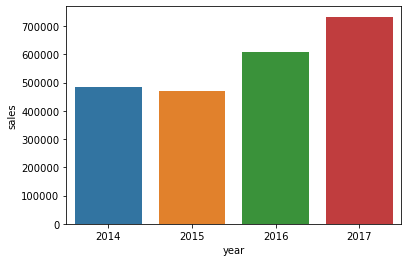

In [38]:
sns.barplot(data=year_sum, x='year', y='sales',)

<AxesSubplot:xlabel='order_date', ylabel='profit'>

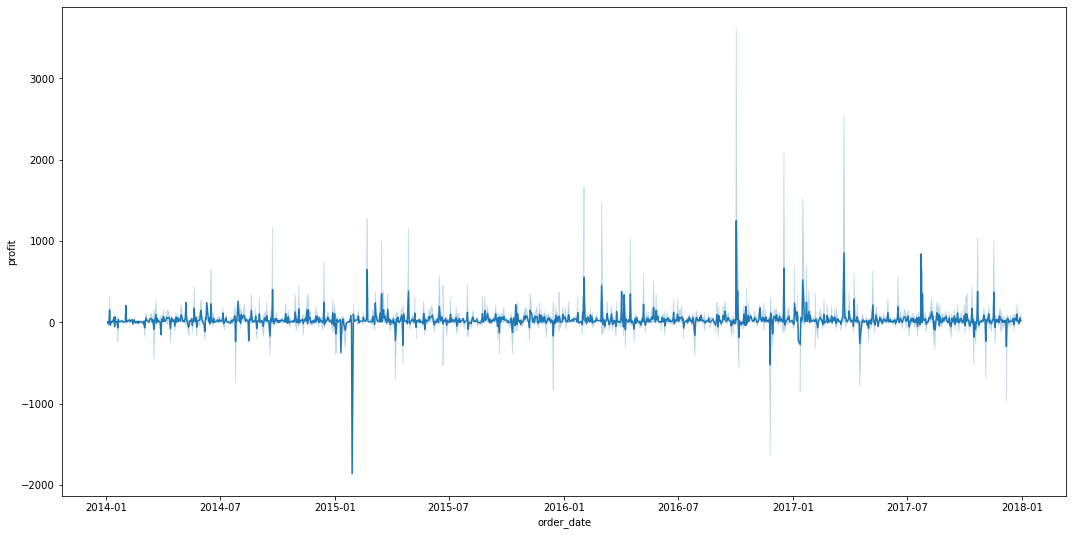

In [39]:
plt.figure(figsize=(18,9))
sns.lineplot(data=ath_df, x = ath_df.order_date, y = 'profit')

### a. Region analysis

In [40]:
region_sum = df.groupby('region')['sales', 'profit'].sum()

C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/1899512984.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_sum = df.groupby('region')['sales', 'profit'].sum()


In [41]:
region_sum.reset_index(inplace= True)
region_sum


,region,sales,profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


#### Q1. Whats the various regions total sales performance?

<AxesSubplot:xlabel='region', ylabel='sales'>

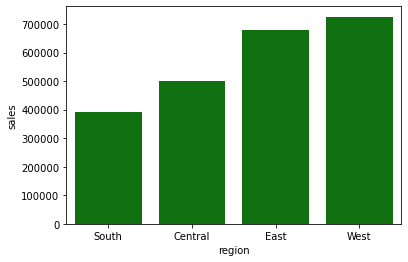

In [42]:

sns.barplot(data= region_sum, x = 'region', y = 'sales', color= 'g', order= region_sum.sort_values('sales').region)

#### Q2. Whats the various regions total profit performance?

<AxesSubplot:xlabel='region', ylabel='profit'>

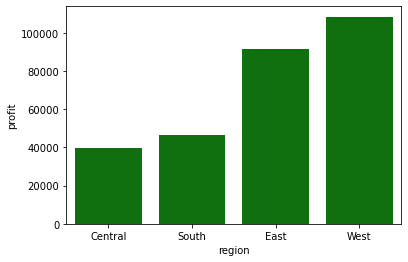

In [43]:
sns.barplot(data= region_sum, x = 'region', y = 'profit', color= 'g', order= region_sum.sort_values('profit').region)

In [44]:
region_cat = df.groupby(['region','category'])['sales', 'profit'].sum()

C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/3771415778.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_cat = df.groupby(['region','category'])['sales', 'profit'].sum()


In [45]:
region_cat.reset_index(inplace=True)
region_cat

,region,category,sales,profit
0,Central,Furniture,163797.1638,-2871.0494
1,Central,Office Supplies,167026.4150,8879.9799
2,Central,Technology,170416.3120,33697.4320
3,East,Furniture,208291.2040,3046.1658
4,East,Office Supplies,205516.0550,41014.5791
5,East,Technology,264973.9810,47462.0351
6,South,Furniture,117298.6840,6771.2061
7,South,Office Supplies,125651.3130,19986.3928
8,South,Technology,148771.9080,19991.8314
9,West,Furniture,252612.7435,11504.9503


#### Q3. What is the regions sales performance by product category

<AxesSubplot:xlabel='region', ylabel='sales'>

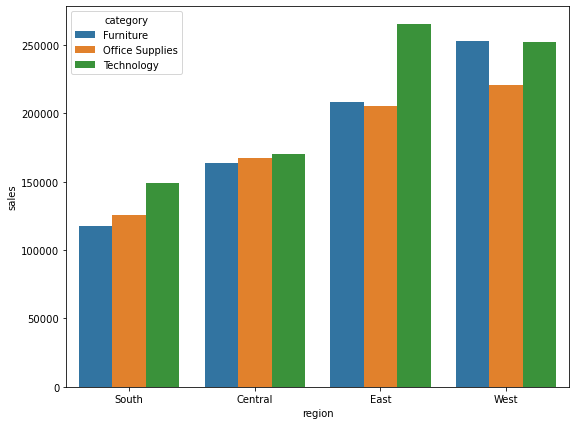

In [46]:
plt.figure(figsize= (9, 7))
sns.barplot(data = region_cat, hue = 'category', y='sales', x = 'region', order= region_sum.sort_values('sales').region)

#### Q4. What is the regions profit performance by product category

<AxesSubplot:xlabel='region', ylabel='profit'>

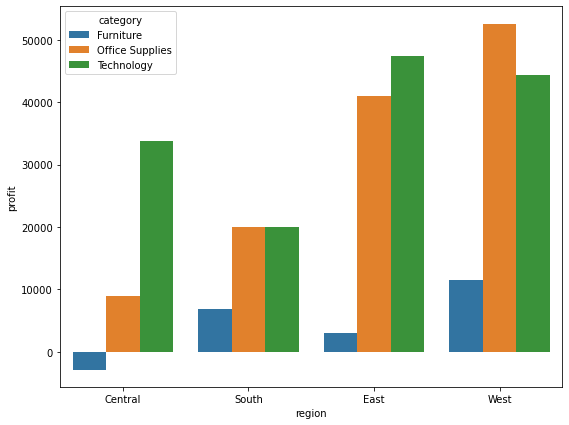

In [47]:
plt.figure(figsize= (9, 7))
sns.barplot(data = region_cat, hue = 'category', y='profit', x = 'region', order= region_sum.sort_values('profit').region)

### b. Customer Segment Analysis

#### Q5. What customer segment is generates more  sales and profit

In [48]:
segmt = df.groupby('segment')['sales','quantity', 'profit',].sum()

C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/343030946.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segmt = df.groupby('segment')['sales','quantity', 'profit',].sum()


<AxesSubplot:xlabel='segment', ylabel='profit'>

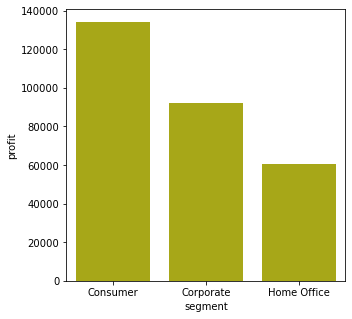

In [49]:
plt.figure(figsize= (5, 5))
sns.barplot(data= segmt, x = segmt.index, y = 'profit',color='y')

<AxesSubplot:xlabel='segment', ylabel='sales'>

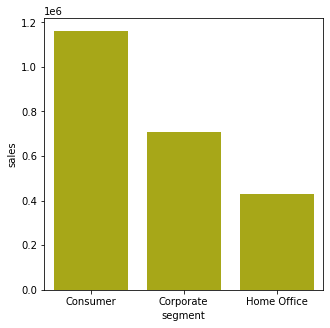

In [50]:
plt.figure(figsize= (5, 5))
sns.barplot(data= segmt, x = segmt.index, y = 'sales',color='y')

In [51]:
segmt1 = df.groupby(['segment','region'])['sales','quantity', 'profit',].sum()

C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/262481850.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segmt1 = df.groupby(['segment','region'])['sales','quantity', 'profit',].sum()


In [52]:
segmt1

sales  quantity      profit
segment     region                                    
Consumer    Central  252031.4340      4519   8564.0481
            East     350908.1670      5347  41190.9843
            South    195580.9710      3178  26913.5728
            West     362880.7730      6477  57450.6040
Corporate   Central  157995.8128      2604  18703.9020
            East     200409.3470      3358  23622.5789
            South    121885.9325      2016  15215.2232
            West     225855.2745      3630  34437.4299
Home Office Central   91212.6440      1657  12438.4124
            East     127463.7260      1913  26709.2168
            South     74255.0015      1015   4620.6343
            West     136721.7770      2159  16530.4150

In [53]:
segmt1.reset_index(inplace= True)
segmt1

,segment,region,sales,quantity,profit
0,Consumer,Central,252031.4340,4519,8564.0481
1,Consumer,East,350908.1670,5347,41190.9843
2,Consumer,South,195580.9710,3178,26913.5728
3,Consumer,West,362880.7730,6477,57450.6040
4,Corporate,Central,157995.8128,2604,18703.9020
5,Corporate,East,200409.3470,3358,23622.5789
6,Corporate,South,121885.9325,2016,15215.2232
7,Corporate,West,225855.2745,3630,34437.4299
8,Home Office,Central,91212.6440,1657,12438.4124
9,Home Office,East,127463.7260,1913,26709.2168


#### Q6. How does the various performs across the regions

<AxesSubplot:xlabel='segment', ylabel='profit'>

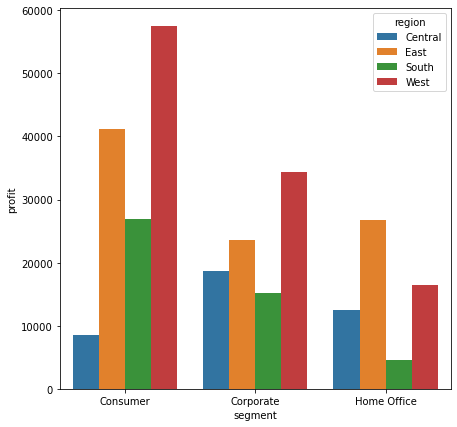

In [54]:
plt.figure(figsize= (7, 7))
sns.barplot(data=segmt1, hue = 'region', y= 'profit', x = 'segment')

### c. Category Analysis

In [55]:
cat = df.groupby('category')['profit','sales','quantity'].sum()

C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/3863071365.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cat = df.groupby('category')['profit','sales','quantity'].sum()


In [56]:
cat.reset_index(inplace= True)
cat

,category,profit,sales,quantity
0,Furniture,18451.2728,741999.7953,8028
1,Office Supplies,122490.8008,719047.0320,22906
2,Technology,145454.9481,836154.0330,6939


#### Q7. Which is the most profitable category

<AxesSubplot:xlabel='category', ylabel='profit'>

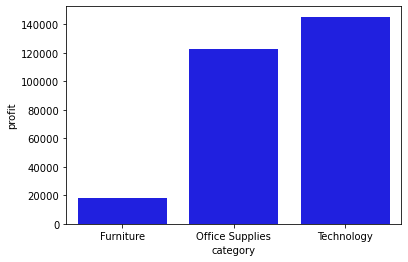

In [57]:
sns.barplot(data=cat, x= 'category', y = 'profit', color= 'b')

In [58]:
cat_sub = df.groupby(['category', 'sub_category',])['profit','sales','quantity'].sum()
cat_sub.reset_index(inplace=True)
cat_sub

C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/3284028098.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cat_sub = df.groupby(['category', 'sub_category',])['profit','sales','quantity'].sum()


,category,sub_category,profit,sales,quantity
0,Furniture,Bookcases,-3472.5560,114879.9963,868
1,Furniture,Chairs,26590.1663,328449.1030,2356
2,Furniture,Furnishings,13059.1436,91705.1640,3563
3,Furniture,Tables,-17725.4811,206965.5320,1241
4,Office Supplies,Appliances,18138.0054,107532.1610,1729
5,Office Supplies,Art,6527.7870,27118.7920,3000
6,Office Supplies,Binders,30221.7633,203412.7330,5974
7,Office Supplies,Envelopes,6964.1767,16476.4020,906
8,Office Supplies,Fasteners,949.5182,3024.2800,914
9,Office Supplies,Labels,5546.2540,12486.3120,1400


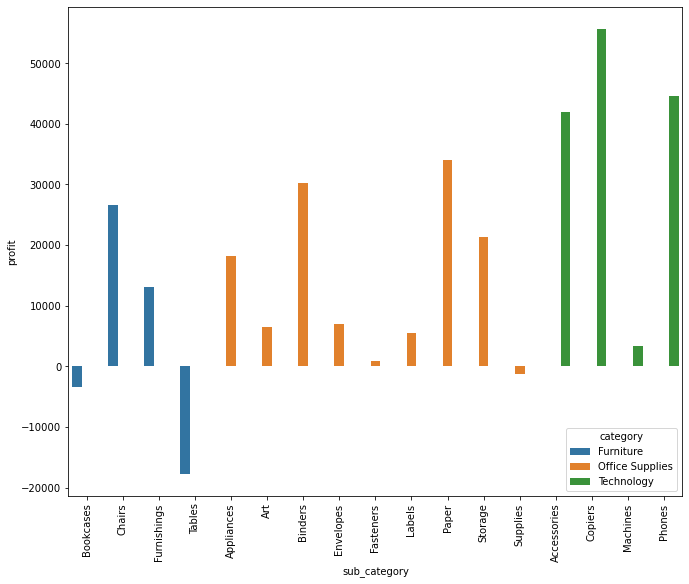

In [59]:
plt.figure(figsize=(11,9))
ax = sns.barplot(data=cat_sub, x= 'sub_category', y = 'profit', hue = 'category')
ax.tick_params(axis='x', rotation=90)

In [60]:
cat_reg = df.groupby(['category', 'region',])['profit','sales','quantity'].sum()
cat_reg.reset_index(inplace=True)
cat_reg

C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/308705220.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cat_reg = df.groupby(['category', 'region',])['profit','sales','quantity'].sum()


,category,region,profit,sales,quantity
0,Furniture,Central,-2871.0494,163797.1638,1827
1,Furniture,East,3046.1658,208291.2040,2214
2,Furniture,South,6771.2061,117298.6840,1291
3,Furniture,West,11504.9503,252612.7435,2696
4,Office Supplies,Central,8879.9799,167026.4150,5409
5,Office Supplies,East,41014.5791,205516.0550,6462
6,Office Supplies,South,19986.3928,125651.3130,3800
7,Office Supplies,West,52609.8490,220853.2490,7235
8,Technology,Central,33697.4320,170416.3120,1544
9,Technology,East,47462.0351,264973.9810,1942


#### Q9. Which category generate more profit in the various regions

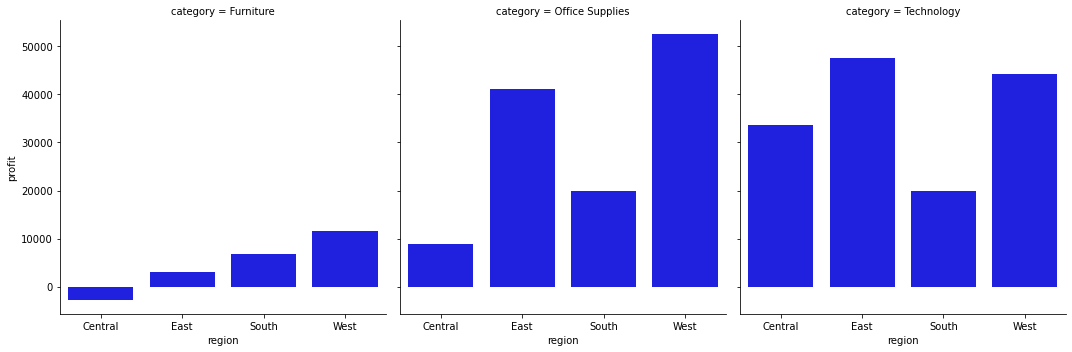

In [61]:
ax = sns.catplot(y="profit", col="category",data= cat_reg, kind="bar",  x='region', color='b')
#ax.tick_params(axis='x', rotation=90)

### d. Product Analysis

In [62]:
prod = df.groupby(['product_id','product_name'])['profit','sales','quantity'].sum()
prod.reset_index(inplace=True)
prod.head()

C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/969302601.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prod = df.groupby(['product_id','product_name'])['profit','sales','quantity'].sum()


,product_id,product_name,profit,sales,quantity
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",-117.8820,825.174,9
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",24.1960,1064.624,10
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,311.1836,2154.348,14
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,-133.1092,723.842,21
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",229.9752,851.760,12


In [63]:
# Top 10 products by sales(generated revenue)
sales_t10 = prod.nlargest(10, 'sales')
sales_t10

,product_id,product_name,profit,sales,quantity
1640,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,2.519993e+04,61599.824,20
787,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,7.753039e+03,27453.384,31
1669,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,-1.811078e+03,22638.480,6
82,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,5.684342e-14,21870.576,39
701,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,2.233505e+03,19823.479,37
667,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,7.609800e+02,19024.500,48
1630,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,6.983884e+03,18839.686,38
1657,TEC-MA-10001127,HP Designjet T520 Inkjet Large Format Printer ...,4.094977e+03,18374.895,12
858,OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,-1.878166e+03,17965.068,27
1443,OFF-SU-10000151,High Speed Automatic Electric Letter Opener,-2.620048e+02,17030.312,11


In [64]:
# Top 10 products by profit
profit_t10 = prod.nlargest(10, 'profit')
profit_t10

,product_id,product_name,profit,sales,quantity
1640,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,25199.9280,61599.824,20
787,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390,27453.384,31
1630,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,6983.8836,18839.686,38
1637,TEC-CO-10003763,Canon PC1060 Personal Laser Copier,4570.9347,11619.834,19
1657,TEC-MA-10001127,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766,18374.895,12
1693,TEC-MA-10003979,Ativa V4110MDD Micro-Cut Shredder,3772.9461,7699.890,11
1656,TEC-MA-10001047,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714,14299.890,11
1541,TEC-AC-10002049,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820,9367.290,24
692,OFF-BI-10001120,Ibico EPK-21 Electric Binding System,3345.2823,15875.916,13
1643,TEC-MA-10000045,Zebra ZM400 Thermal Label Printer,3343.5360,6965.700,6


#### Q10. What are the Top 10 product by sales

<AxesSubplot:xlabel='sales', ylabel='product_name'>

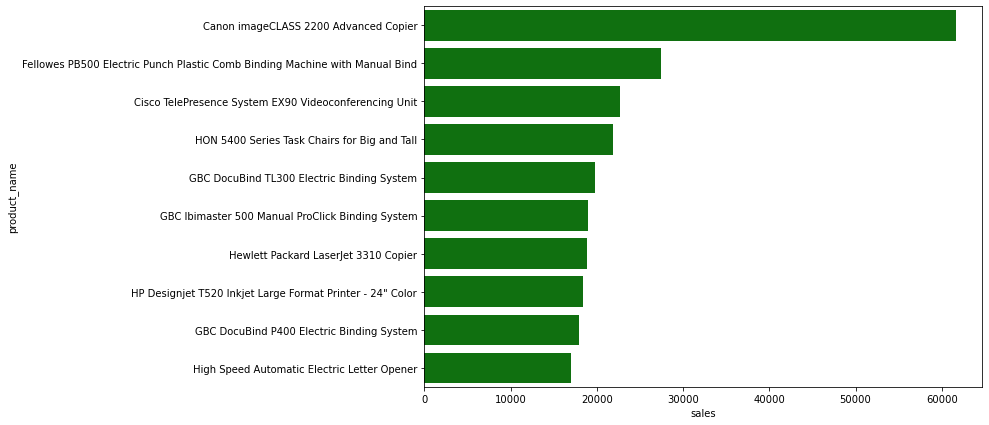

In [65]:
plt.figure(figsize=(10,7))
sns.barplot(data=sales_t10, x = 'sales', y='product_name', color= 'g')

#### Q10 What are the Top 10 product by profit

<AxesSubplot:xlabel='profit', ylabel='product_name'>

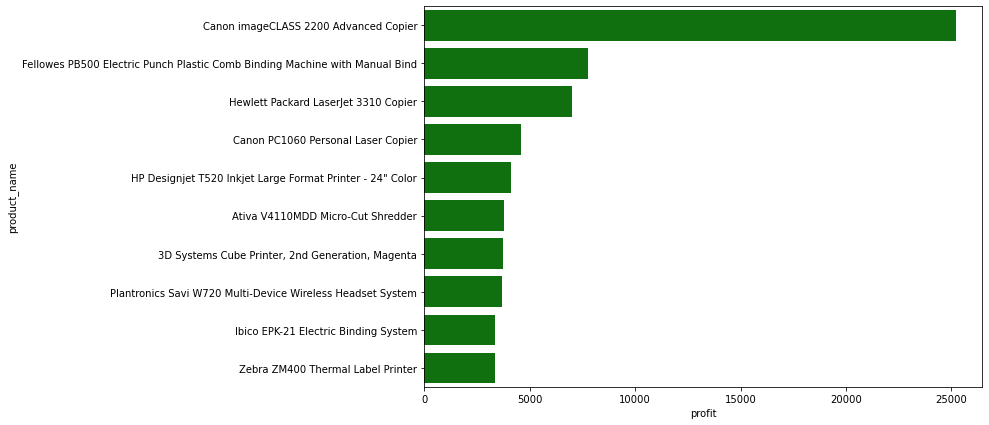

In [66]:
plt.figure(figsize=(10,7))
sns.barplot(data=profit_t10, x = 'profit', y='product_name', color= 'g')

## Regression Analysis

a. Analysis for profit using sklearn linear model

In [68]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')

In [70]:
reg_df = df.copy()

In [71]:
reg_df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [73]:
reg_df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')

In [83]:
reg_dummies = pd.get_dummies(reg_df, prefix= '', prefix_sep='', columns= [ 'ship_mode', 'segment',  'region','category'])

In [84]:
reg_dummies.head()

,order_id,order_date,ship_date,customer_id,customer_name,city,state,postal_code,product_id,sub_category,...,Consumer,Corporate,Home Office,Central,East,South,West,Furniture,Office Supplies,Technology
0,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,Henderson,Kentucky,42420,FUR-BO-10001798,Bookcases,...,1,0,0,0,0,1,0,1,0,0
1,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,Henderson,Kentucky,42420,FUR-CH-10000454,Chairs,...,1,0,0,0,0,1,0,1,0,0
2,CA-2016-138688,2016-06-12,2016-06-16,DV-13045,Darrin Van Huff,Los Angeles,California,90036,OFF-LA-10000240,Labels,...,0,1,0,0,0,0,1,0,1,0
3,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Tables,...,1,0,0,0,0,1,0,1,0,0
4,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Storage,...,1,0,0,0,0,1,0,0,1,0


In [85]:
reg_dummies.columns

Index(['order_id', 'order_date', 'ship_date', 'customer_id', 'customer_name',
       'city', 'state', 'postal_code', 'product_id', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'First Class', 'Same Day', 'Second Class', 'Standard Class', 'Consumer',
       'Corporate', 'Home Office', 'Central', 'East', 'South', 'West',
       'Furniture', 'Office Supplies', 'Technology'],
      dtype='object')

In [86]:
corr = reg_dummies.corr()
corr.head()

,sales,quantity,discount,profit,First Class,Same Day,Second Class,Standard Class,Consumer,Corporate,Home Office,Central,East,South,West,Furniture,Office Supplies,Technology
sales,1.000000,0.200795,-0.028190,0.479064,-0.000931,0.002515,0.004915,-0.004444,-0.010216,0.004187,0.008310,-0.012437,0.008588,0.008431,-0.003708,0.099922,-0.218568,0.170260
quantity,0.200795,1.000000,0.008623,0.066253,-0.016870,-0.019391,0.005938,0.016580,-0.013562,0.016011,-0.001505,-0.002468,-0.017405,0.008528,0.012334,-0.001065,0.006436,-0.006991
discount,-0.028190,0.008623,1.000000,-0.219487,0.017368,-0.004422,-0.041214,0.022533,0.009761,0.006457,-0.020483,0.224314,-0.033142,-0.019068,-0.155915,0.044552,0.006461,-0.055077
profit,0.479064,0.066253,-0.219487,1.000000,0.005795,0.000624,0.001844,-0.006040,-0.012515,0.005056,0.010268,-0.027167,0.009376,0.000377,0.015222,-0.044221,-0.043822,0.101825
First Class,-0.000931,-0.016870,0.017368,0.005795,1.000000,-0.102225,-0.209645,-0.519246,-0.016570,0.012225,0.006960,-0.038399,0.031768,-0.011516,0.013122,0.000403,-0.009836,0.011974


In [87]:
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


C:\Users\osazu\AppData\Local\Temp/ipykernel_16368/259429173.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

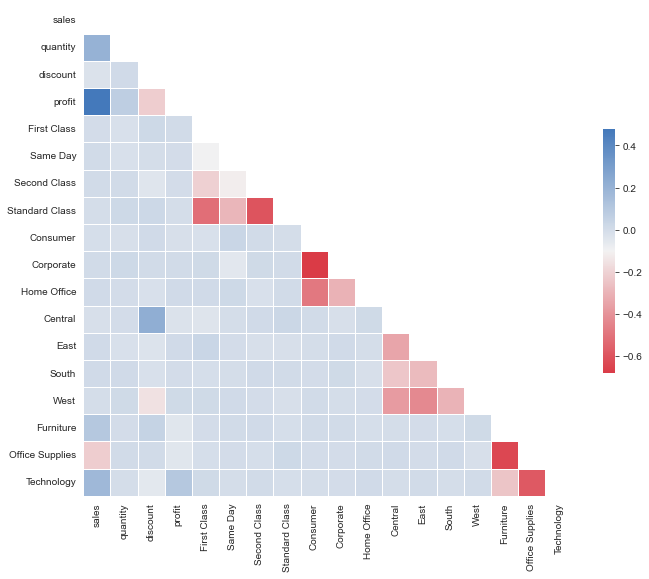

In [88]:
# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [91]:
corr.columns

Index(['sales', 'quantity', 'discount', 'profit', 'First Class', 'Same Day',
       'Second Class', 'Standard Class', 'Consumer', 'Corporate',
       'Home Office', 'Central', 'East', 'South', 'West', 'Furniture',
       'Office Supplies', 'Technology'],
      dtype='object')

In [101]:
corr

,sales,quantity,discount,profit,First Class,Same Day,Second Class,Standard Class,Consumer,Corporate,Home Office,Central,East,South,West,Furniture,Office Supplies,Technology
sales,1.000000,0.200795,-0.028190,0.479064,-0.000931,0.002515,0.004915,-0.004444,-0.010216,0.004187,0.008310,-0.012437,0.008588,0.008431,-0.003708,0.099922,-0.218568,0.170260
quantity,0.200795,1.000000,0.008623,0.066253,-0.016870,-0.019391,0.005938,0.016580,-0.013562,0.016011,-0.001505,-0.002468,-0.017405,0.008528,0.012334,-0.001065,0.006436,-0.006991
discount,-0.028190,0.008623,1.000000,-0.219487,0.017368,-0.004422,-0.041214,0.022533,0.009761,0.006457,-0.020483,0.224314,-0.033142,-0.019068,-0.155915,0.044552,0.006461,-0.055077
profit,0.479064,0.066253,-0.219487,1.000000,0.005795,0.000624,0.001844,-0.006040,-0.012515,0.005056,0.010268,-0.027167,0.009376,0.000377,0.015222,-0.044221,-0.043822,0.101825
First Class,-0.000931,-0.016870,0.017368,0.005795,1.000000,-0.102225,-0.209645,-0.519246,-0.016570,0.012225,0.006960,-0.038399,0.031768,-0.011516,0.013122,0.000403,-0.009836,0.011974
Same Day,0.002515,-0.019391,-0.004422,0.000624,-0.102225,1.000000,-0.117828,-0.291836,0.030888,-0.048146,0.017439,-0.006495,0.000255,-0.006011,0.010379,0.004060,-0.001271,-0.002675
Second Class,0.004915,0.005938,-0.041214,0.001844,-0.209645,-0.117828,1.000000,-0.598503,0.004929,0.011700,-0.020465,0.007722,-0.013588,0.009409,-0.001277,0.008788,-0.010724,0.004260
Standard Class,-0.004444,0.016580,0.022533,-0.006040,-0.519246,-0.291836,-0.598503,1.000000,-0.006063,0.003813,0.003339,0.025019,-0.012522,0.003655,-0.013420,-0.009267,0.016480,-0.011012
Consumer,-0.010216,-0.013562,0.009761,-0.012515,-0.016570,0.030888,0.004929,-0.006063,1.000000,-0.684119,-0.484448,0.002564,-0.004563,-0.001873,0.003572,0.005548,-0.001218,-0.004310
Corporate,0.004187,0.016011,0.006457,0.005056,0.012225,-0.048146,0.011700,0.003813,-0.684119,1.000000,-0.306648,-0.014943,0.007911,0.012101,-0.003683,0.002704,-0.000421,-0.002318


In [99]:
corr.profit

sales              0.479064
quantity           0.066253
discount          -0.219487
profit             1.000000
First Class        0.005795
Same Day           0.000624
Second Class       0.001844
Standard Class    -0.006040
Consumer          -0.012515
Corporate          0.005056
Home Office        0.010268
Central           -0.027167
East               0.009376
South              0.000377
West               0.015222
Furniture         -0.044221
Office Supplies   -0.043822
Technology         0.101825
Name: profit, dtype: float64

In [102]:
# Select dependent and independent variables
y = reg_dummies.profit
X = reg_dummies[['First Class', 'Same Day','Second Class', 'Standard Class', 'Consumer', 'Corporate','Home Office', 'Central', 'East', 'South', 'West', 'Furniture','Office Supplies', 'Technology','discount']]

In [103]:
# Divide data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  

In [104]:
# Train the regression model
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression()

In [105]:
# Extract the coefficient for each variable found by the model
attributes_coefficients = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
attributes_coefficients

,Coefficient
First Class,-2.316306e+13
Same Day,-2.316306e+13
Second Class,-2.316306e+13
Standard Class,-2.316306e+13
Consumer,5.198559e+14
Corporate,5.198559e+14
Home Office,5.198559e+14
Central,8.052236e+13
East,8.052236e+13
South,8.052236e+13


In [106]:
# Test the performance of the model
y_pred = reg.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comparison

,Actual,Predicted
3125,21.1428,12.875
1441,11.4600,-3.125
4510,17.1580,63.625
39,-15.1470,-8.750
4509,-6.4233,-5.125
...,...,...
4023,6.5490,18.500
5635,28.8960,1.750
6685,-19.7372,-86.250
6750,20.7332,50.500


In [109]:
from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

MAE: 74.11928483393356
MSE: 49485.621966170074
RMSE: 222.45364003803147
